In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
countries = pd.read_csv('dataSets\\countries.csv')
countries.head()

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2
0,0,Burundi,108,Melanesia,928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Burundi,108,Micronesia,954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Burundi,108,Polynesia,957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Burundi,108,Belgium,56,642,621,475,466,497,605,718,315,303,231,224,236,288,343,327,318,244,242,261,317,375
4,4,Burundi,108,DemocraticRepublicoftheCongo,180,36654,41447,37951,99099,147611,175768,199585,17963,20152,18451,49968,75099,89489,101757,18691,21295,19500,49131,72512,86279,97828


In [3]:
len(countries.Destination.unique())

234

In [4]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        13335 non-null  int64 
 1   Destination       13335 non-null  object
 2   Destination_Code  13335 non-null  int64 
 3   Origin            13335 non-null  object
 4   Origin_Code       13335 non-null  int64 
 5   1990              13335 non-null  object
 6   1995              13335 non-null  int64 
 7   2000              13335 non-null  int64 
 8   2005              13335 non-null  int64 
 9   2010              13335 non-null  int64 
 10  2015              13335 non-null  int64 
 11  2020              13335 non-null  int64 
 12  1990.1            13335 non-null  int64 
 13  1995.1            13335 non-null  int64 
 14  2000.1            13335 non-null  int64 
 15  2005.1            13335 non-null  int64 
 16  2010.1            13335 non-null  int64 
 17  2015.1      

In [5]:
countries = countries.drop(countries[(countries['1990'].str.len() > 10) | (countries['1990'] == 'MacaoSAR')].index)

In [6]:
countries['1990']= pd.to_numeric(countries['1990'])

In [7]:
origins = countries.loc[(countries['Origin'] == 'Rwanda') | (countries['Origin'] == 'Spain') | (countries['Origin'] == 'Israel') | (countries['Origin'] == 'Mexico')]
origins

,Unnamed: 0,Destination,Destination_Code,Origin,Origin_Code,1990,1995,2000,2005,2010,2015,2020,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,2020.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2020.2
7,7,Burundi,108,Rwanda,646,221943,160197,66415,61104,54794,64363,76567,108772,78063,32288,28813,24786,29140,34728,113171,82134,34127,32291,30008,35223,41839
38,38,Eritrea,232,Rwanda,646,991,703,414,385,385,467,407,540,366,191,179,182,220,196,451,337,223,206,203,247,211
55,55,Ethiopia,231,Rwanda,646,71,93,132,97,121,150,138,37,55,83,55,63,76,68,34,38,49,42,58,74,70
70,70,Kenya,404,Rwanda,646,3874,5861,3273,4059,6201,6330,5510,2155,3107,1630,2097,3067,3142,2765,1719,2754,1643,1962,3134,3188,2745
92,92,Malawi,454,Rwanda,646,2249,5138,4947,4714,6482,5582,6280,821,2725,2617,2487,3416,2915,3231,1428,2413,2330,2227,3066,2667,3049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12999,12999,Polynesia,957,Rwanda,646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13084,13084,Polynesia,957,Israel,376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13134,13134,Polynesia,957,Spain,724,72,79,85,88,85,80,80,55,60,64,67,65,61,61,17,19,21,21,20,19,19
13177,13177,Polynesia,957,Mexico,484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


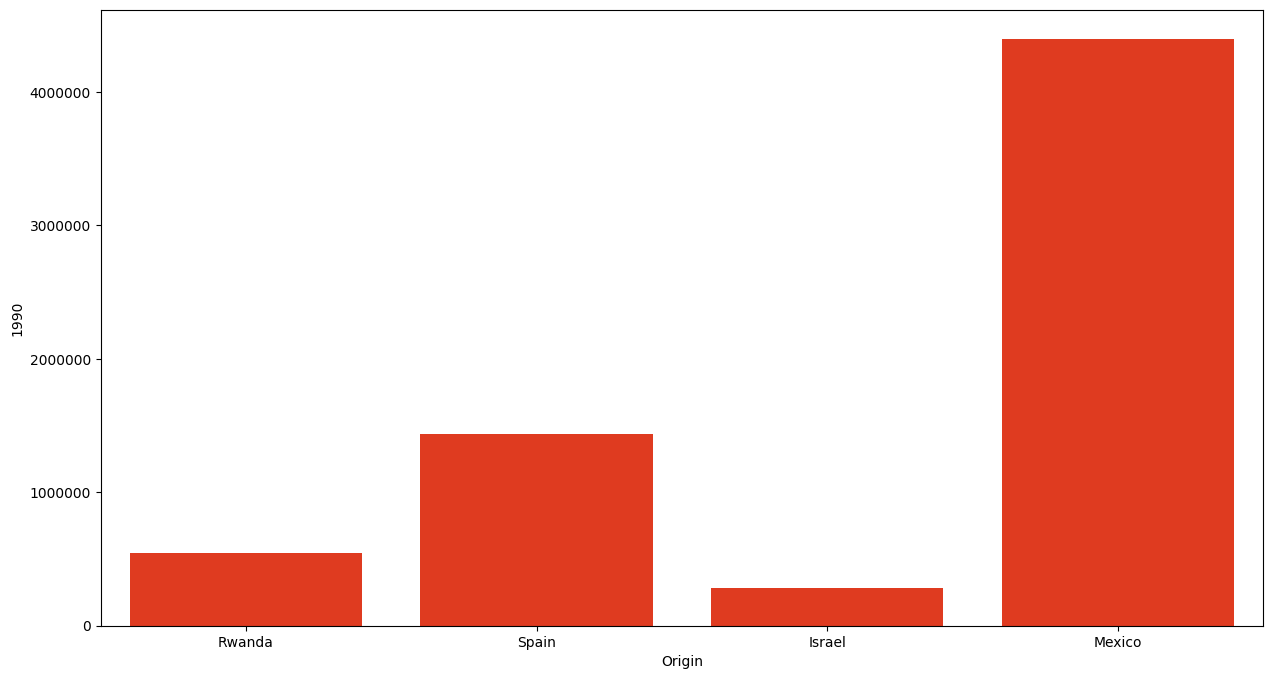

In [8]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="1990", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

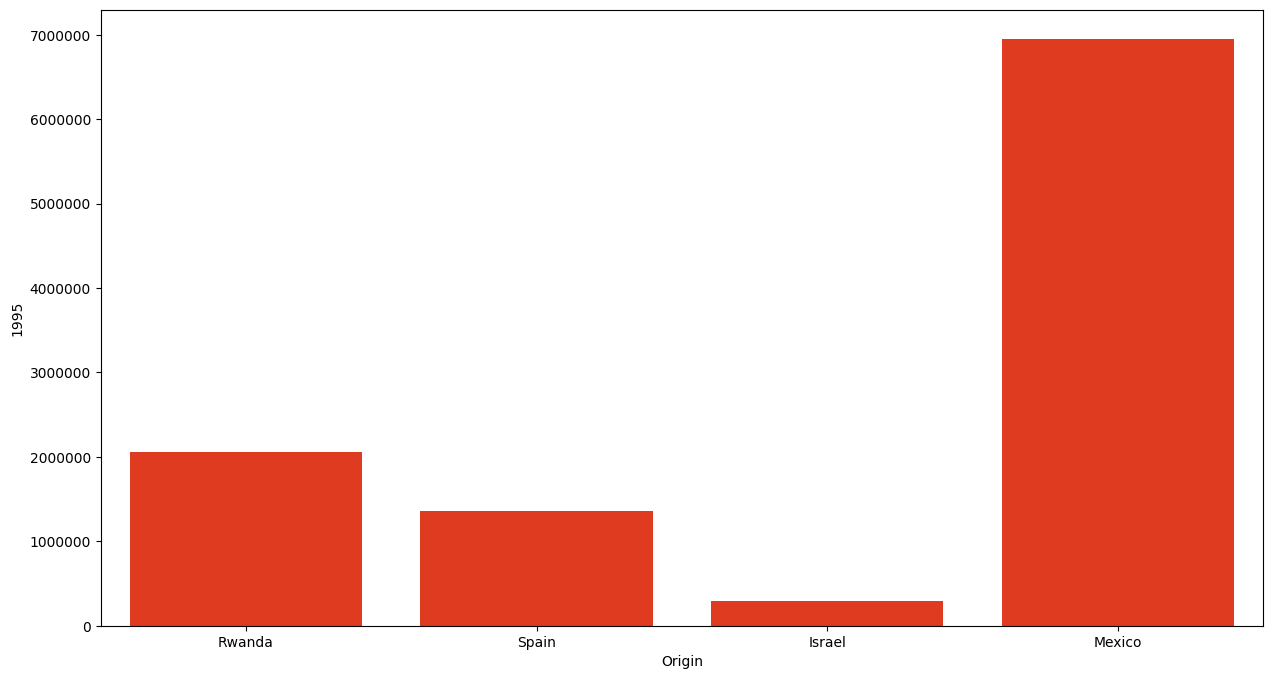

In [9]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="1995", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

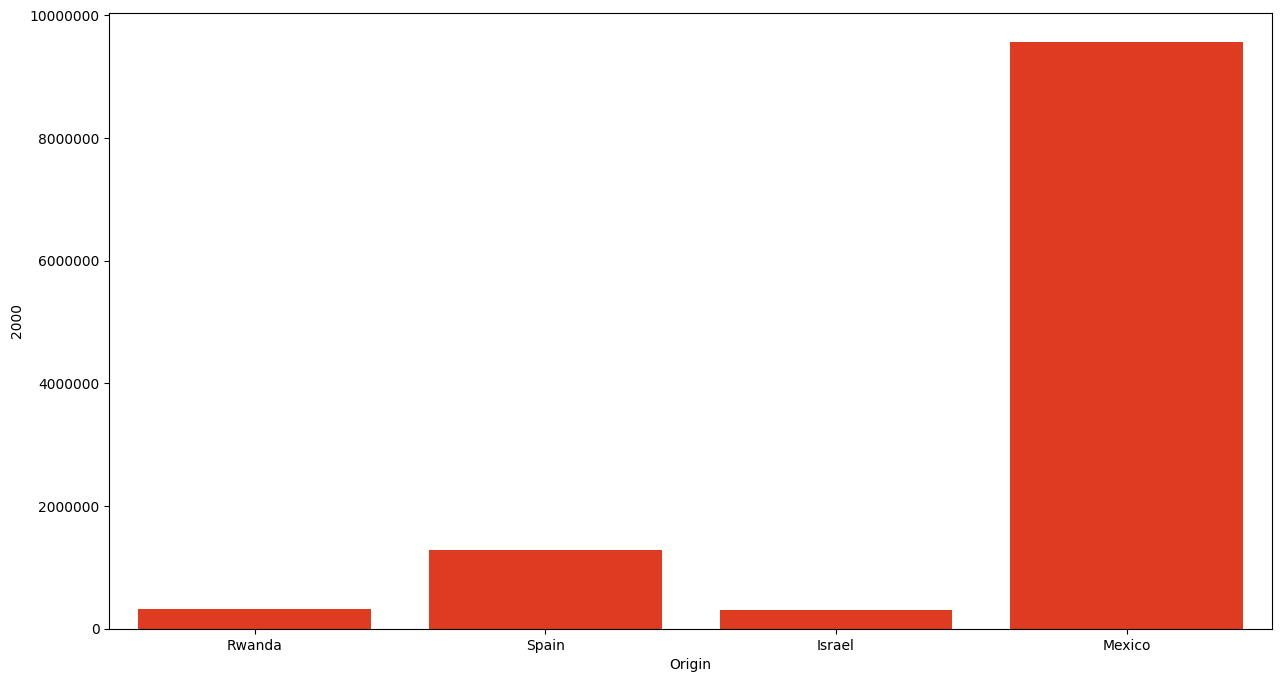

In [10]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="2000", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

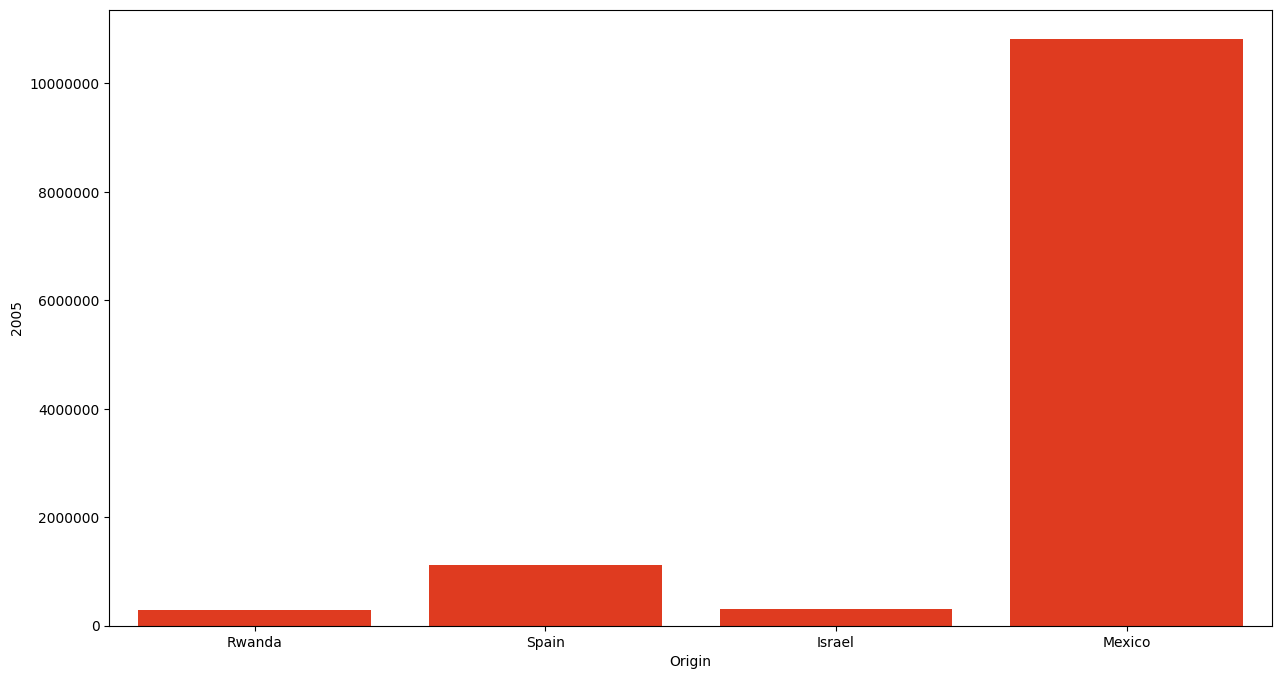

In [11]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="2005", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

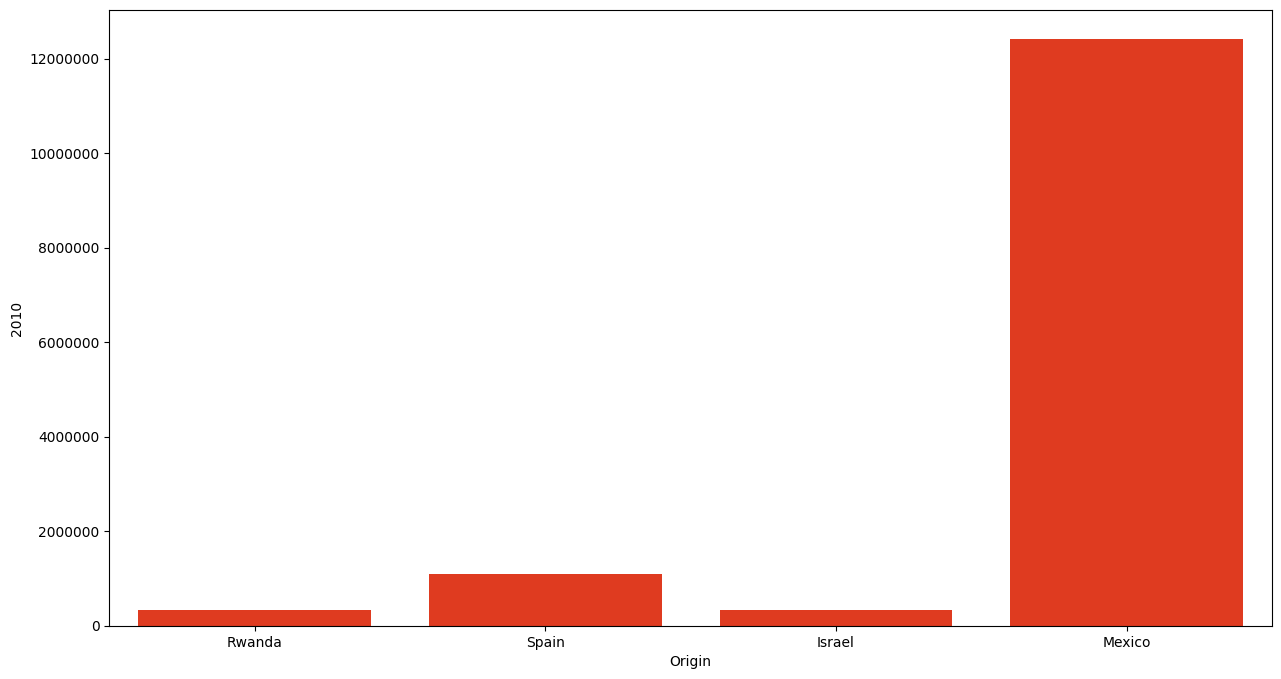

In [12]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="2010", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

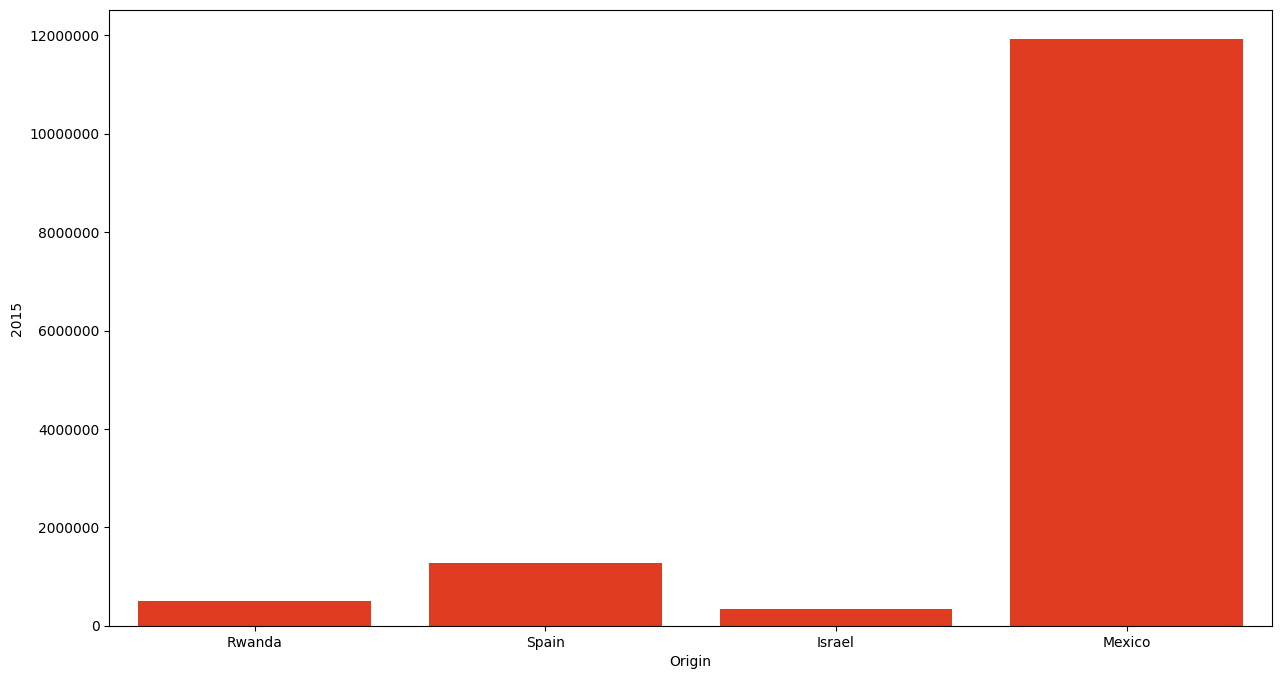

In [13]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="2015", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()

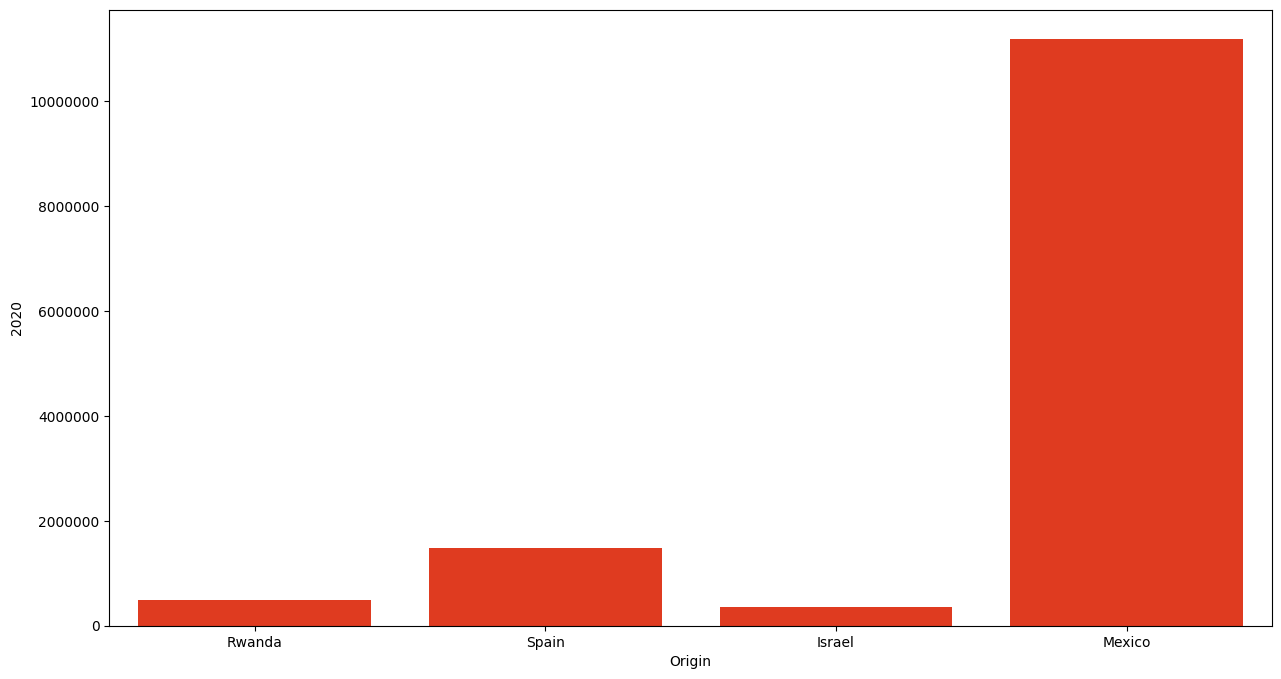

In [14]:
plt.figure(figsize=(15, 8))
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
sns.barplot(
    y="2020", 
    x="Origin", 
    data=origins, 
    estimator=sum, 
    errorbar=None, 
    color='#FF2400'
    )
plt.show()